### Módulos requeridos para el EDA

In [1]:

#módulos necesarios para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### Datos a emplear

In [6]:
#importamos los datasets

df1=pd.read_csv("../data/nutrition.csv")
df2=pd.read_csv("../data/Top 100 Healthiest Food in the World.csv")

### Visión inicial y preprocesado de datos

In [7]:
#dataset principal con datos macro y micro
#dataset original
df1

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [8]:
#preprocesado de datos de df1
df1.info()

#errores: 
#-irom(columna 31)
#-saturated_fat tiene NaNs
#la mayoría de datos está en strings con formato gramos entre otros
# renombrar "calories" a kcal para mayor claridad
#agrupar las columnas macro 
#limpiar formato columnas macro
#eliminar columna Unnamed: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [9]:
#eliminamos columna inutil
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
#no hace falta trabajar la columna serving size, al menos de momento
df1["serving_size"].unique()

array(['100 g'], dtype=object)

In [11]:
#renombrar columna calories
#renombrar columna irom
df1.rename(columns={"calories":"kilocalories"},inplace=True)
df1.rename(columns={"irom":"iron"},inplace=True)


In [12]:
#limpiar formato de macronutrientes
df1[["name","total_fat","carbohydrate","protein"]]

,name,total_fat,carbohydrate,protein
0,Cornstarch,0.1g,91.27 g,0.26 g
1,"Nuts, pecans",72g,13.86 g,9.17 g
2,"Eggplant, raw",0.2g,5.88 g,0.98 g
3,"Teff, uncooked",2.4g,73.13 g,13.30 g
4,"Sherbet, orange",2g,30.40 g,1.10 g
...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",3.5g,0.00 g,23.45 g
8785,"Lamb, cooked, separable lean only, composite o...",8.9g,0.00 g,29.59 g
8786,"Lamb, raw, separable lean and fat, composite o...",23g,0.00 g,16.74 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",3g,0.00 g,23.37 g


In [13]:
#parece que la columna "total_fat" contiene únicamente g's al final
df1[df1['total_fat'].str.endswith('g')]

,name,serving_size,kilocalories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [14]:
#eliminamos las g's 
df1['total_fat'] = df1['total_fat'].str.replace('g','')

In [15]:
#comprobamos carbohydrates
df1[df1['carbohydrate'].str.endswith(' g')]

,name,serving_size,kilocalories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [16]:
#eliminamos las G's
df1['carbohydrate'] = df1['carbohydrate'].str.replace(' g','')



In [17]:
#eliminamos las Gs de protein

df1['protein'] = df1['protein'].str.replace(' g','')

In [18]:
#df con formateo correcto para más tarde
macros=df1[["name","kilocalories","total_fat","carbohydrate","protein"]]

In [19]:
macros

,name,kilocalories,total_fat,carbohydrate,protein
0,Cornstarch,381,0.1,91.27,0.26
1,"Nuts, pecans",691,72,13.86,9.17
2,"Eggplant, raw",25,0.2,5.88,0.98
3,"Teff, uncooked",367,2.4,73.13,13.30
4,"Sherbet, orange",144,2,30.40,1.10
...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,0.00,23.45
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,0.00,29.59
8786,"Lamb, raw, separable lean and fat, composite o...",277,23,0.00,16.74
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3,0.00,23.37


In [29]:
#para acelerar el proceso de limpiado, guardamos la columna "name"
#la concatenaremos más tarde 
namecolumn=df1["name"]
namecolumn

0                                              Cornstarch
1                                            Nuts, pecans
2                                           Eggplant, raw
3                                          Teff, uncooked
4                                         Sherbet, orange
                              ...                        
8784    Beef, raw, all grades, trimmed to 0" fat, sepa...
8785    Lamb, cooked, separable lean only, composite o...
8786    Lamb, raw, separable lean and fat, composite o...
8787    Beef, raw, all grades, trimmed to 0" fat, sepa...
8788    Beef, raw, all grades, trimmed to 0" fat, sepa...
Name: name, Length: 8789, dtype: object

In [21]:
#test=df1.iloc[:,1:].apply(pd.to_numeric,errors="coerce")

In [22]:
#test= df1["serving_size"].split(" ")
#df1




In [23]:
#manera más fácil: regex

# Eliminar los caracteres no numéricos usando una expresión regular
# Esta expresión regular elimina todo lo que no sea un número, incluyendo decimales.
#test["sodium"] = df1['sodium'].replace(r'[^\d.]+', '', regex=True)

# Convierte la columna 'Valor' a tipo float
#test = df1['sodium'].astype(float)

In [24]:
test.info()

NameError: name 'test' is not defined

In [ ]:
#test['sodium'].astype(float)

In [ ]:
test1=pd.concat([test,namecolumn],axis=1)

In [ ]:
#parece que el cambio de formato ha sido exitoso
test1

,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,...,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,name
0,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,0.000,...,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,Cornstarch
1,691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,0.863,...,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,"Nuts, pecans"
2,25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,0.281,...,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,"Eggplant, raw"
3,367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,0.942,...,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,"Teff, uncooked"
4,144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,0.224,...,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,"Sherbet, orange"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,0.356,...,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51,"Beef, raw, all grades, trimmed to 0"" fat, sepa..."
8785,206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,0.580,...,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95,"Lamb, cooked, separable lean only, composite o..."
8786,277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,0.520,...,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80,"Lamb, raw, separable lean and fat, composite o..."
8787,121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,0.355,...,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43,"Beef, raw, all grades, trimmed to 0"" fat, sepa..."


In [ ]:
df1[df1["name"]=="Vegetarian fillets"]["sodium"]

9    490.00 mg
Name: sodium, dtype: object

In [ ]:
# antes de realizar el bucle para la mayoría de columnas hay que renombrarlas para que incluyan la unidad en la que se miden

In [33]:
my_dict = {
'calories_100g' :"calories",
'total_fat_g' :"total_fat",
'saturated_fat_g' : "saturated_fat",
'cholesterol_mg' :"cholesterol",
'sodium_mg': "sodium",
'choline_mg': "choline",
'folate_mcg' : "folate",
'folic_acid_mcg' :"folic_acid",
'niacin_mg' : "niacin",
'pantothenic_acid_mg' : "pantothenic_acid",
'riboflavin_mg' : "riboflavin",
'thiamin_mg' : "thiamin",
'vitamin_a_IU' : "vitamin_a",
'vitamin_a_rae_mcg' :  "vitamin_a_rae",
'carotene_alpha_mcg' : "carotene_alpha",
'carotene_beta_mcg' : "carotene_beta",
'cryptoxanthin_beta_mcg' : "cryptoxanthin_beta",
'lutein_zeaxanthin_mcg' :"lutein_zeaxanthin",

'vitamin_b12_mcg' :"vitamin_b12",
'vitamin_b6_mg':"vitamin_b6",
'vitamin_c_mg':"vitamin_c",
'vitamin_d_IU':"vitamin_d",
'vitamin_e_mg':"vitamin_e",
'tocopherol_alpha_mg':"tocopherol_alpha",
'vitamin_k_mcg':"vitamin_k",
'calcium_mg':"calcium",
'copper_mg':"copper",
'irom_mg' :"iron",
'magnesium_mg':"magnesium",
'manganese_mg':"manganese",
'phosphorous_mg':"phosphorous",
'potassium_mg':"potassium",
'selenium_mcg':"selenium",
'zinc_mg':"zink",
'protein_g':"protein",
'alanine_g':"alanine",
'arginine_g':"arginine",
'aspartic_acid_g':"aspartic_acid",
'cystine_g':"cystine",
'glutamic_acid_g':"glutamic_acid",
'glycine_g':"glycine",
'histidine_g':"histidine",
'hydroxyproline_g':"hydroxyproline",
'isoleucine_g':"isoleucine",
'leucine_g':"leucine",
'lysine_g':"lysine",
'methionine_g':"methionine",
'phenylalanine_g':"phenylalanine",
'proline_g':"proline",
'serine_g':"serine",
'threonine_g':"threonine",
'tryptophan_g':"tryptophan",
'tyrosine_g':"tyrosine",
'valine_g':"valine",
'carbohydrate_g':"carbohydrate",
'fiber_g':"fiber",
'sugars_g':"sugars",
'fructose_g':"fructose",
'galactose_g':"galactose",
'glucose_g':"glucose",
'lactose_g':"lactose",
'maltose_g':"maltose",
'sucrose_g':"sucrose",
'fat_g':"fat",
'saturated_fatty_acids_g':"saturated_fatty_acids",
'monounsaturated_fatty_acids_g':"monounsaturated_fatty_acids",
'polyunsaturated_fatty_acids_g':"polyunsaturated_fatty_acids",
'fatty_acids_total_trans_mg':"fatty_acids_total_trans",
'alcohol_g':"alcohol",
'ash_g':"ash",
'caffeine_mg':"caffeine",
'theobromine_mg':"theobromine",
'water_g':"water"}
reversed_dict = {}
for key, value in my_dict.items():
    reversed_dict[value] = key
print(reversed_dict)

{'calories': 'calories_100g', 'total_fat': 'total_fat_g', 'saturated_fat': 'saturated_fat_g', 'cholesterol': 'cholesterol_mg', 'sodium': 'sodium_mg', 'choline': 'choline_mg', 'folate': 'folate_mcg', 'folic_acid': 'folic_acid_mcg', 'niacin': 'niacin_mg', 'pantothenic_acid': 'pantothenic_acid_mg', 'riboflavin': 'riboflavin_mg', 'thiamin': 'thiamin_mg', 'vitamin_a': 'vitamin_a_IU', 'vitamin_a_rae': 'vitamin_a_rae_mcg', 'carotene_alpha': 'carotene_alpha_mcg', 'carotene_beta': 'carotene_beta_mcg', 'cryptoxanthin_beta': 'cryptoxanthin_beta_mcg', 'lutein_zeaxanthin': 'lutein_zeaxanthin_mcg', 'vitamin_b12': 'vitamin_b12_mcg', 'vitamin_b6': 'vitamin_b6_mg', 'vitamin_c': 'vitamin_c_mg', 'vitamin_d': 'vitamin_d_IU', 'vitamin_e': 'vitamin_e_mg', 'tocopherol_alpha': 'tocopherol_alpha_mg', 'vitamin_k': 'vitamin_k_mcg', 'calcium': 'calcium_mg', 'copper': 'copper_mg', 'iron': 'irom_mg', 'magnesium': 'magnesium_mg', 'manganese': 'manganese_mg', 'phosphorous': 'phosphorous_mg', 'potassium': 'potassium_m

In [34]:
#df1_test = 
df1.rename(columns=reversed_dict)

,name,serving_size,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,Cornstarch,100 g,381,0.1,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [35]:
df1_test=df1.rename(columns=reversed_dict)

In [ ]:
df1_test
#dataframe con nombres corregidos

,name,serving_size,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,Cornstarch,100 g,381,0.1,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [36]:
for i in df1_test:
    df1_test[i] = df1_test[i].replace(r'[^\d.]+', '', regex=True)

In [ ]:
df1_test
#dataframe sin letras pero sin los nombres

,name,serving_size,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,,100,381,0.1,NaN,0,9.00,0.4,0.00,0.00,...,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
1,,100,691,72,6.2,0,0.00,40.5,22.00,0.00,...,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
2,,100,25,0.2,NaN,0,2.00,6.9,22.00,0.00,...,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
3,,100,367,2.4,0.4,0,12.00,13.1,0,0,...,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
4,,100,144,2,1.2,1,46.00,7.7,4.00,0.00,...,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,0,100,125,3.5,1.4,62,54.00,64.5,4.00,0.00,...,3.50,1.353,1.554,0.244,62.00,0.0,1.11,0.00,0.00,72.51
8785,,100,206,8.9,3.9,109,50.00,0,0.00,0.00,...,8.86,3.860,3.480,0.520,109.00,0,1.60,0,0,59.95
8786,,100,277,23,12,78,39.00,0,1.00,0.00,...,22.74,11.570,8.720,0.980,78.00,0,0.92,0,0,59.80
8787,0,100,121,3,1.1,60,53.00,64.2,4.00,0.00,...,3.04,1.086,1.266,0.233,60.00,0.0,1.10,0.00,0.00,73.43


In [ ]:
df1_test

,name,serving_size,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,,100,381,0.1,NaN,0,9.00,0.4,0.00,0.00,...,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
1,,100,691,72,6.2,0,0.00,40.5,22.00,0.00,...,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
2,,100,25,0.2,NaN,0,2.00,6.9,22.00,0.00,...,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
3,,100,367,2.4,0.4,0,12.00,13.1,0,0,...,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
4,,100,144,2,1.2,1,46.00,7.7,4.00,0.00,...,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,0,100,125,3.5,1.4,62,54.00,64.5,4.00,0.00,...,3.50,1.353,1.554,0.244,62.00,0.0,1.11,0.00,0.00,72.51
8785,,100,206,8.9,3.9,109,50.00,0,0.00,0.00,...,8.86,3.860,3.480,0.520,109.00,0,1.60,0,0,59.95
8786,,100,277,23,12,78,39.00,0,1.00,0.00,...,22.74,11.570,8.720,0.980,78.00,0,0.92,0,0,59.80
8787,0,100,121,3,1.1,60,53.00,64.2,4.00,0.00,...,3.04,1.086,1.266,0.233,60.00,0.0,1.10,0.00,0.00,73.43


In [37]:
test=df1_test.iloc[:,2:].apply(pd.to_numeric,errors="coerce")

In [ ]:
test
#ahora todos los valores son numericos
#pero le falta columnas
#name, serving_size y kilocalories
#ahora solo faltan la columna name que podemos concatenar

,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,0.863,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,0.281,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,0.942,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,0.224,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,0.356,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,0.580,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,0.520,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,0.355,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


In [38]:
df_1=pd.concat([namecolumn,test],axis=1)

In [ ]:
df_1
#este deberia ser el dataset definitivo
#a pesar de los numeros NaNs en saturated_fat_g, usaré la columna en el análisis
#si es necesario, introduciré manualmente los valores

,name,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,Cornstarch,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,"Nuts, pecans",691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,"Eggplant, raw",25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,"Teff, uncooked",367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,"Sherbet, orange",144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


In [ ]:
AminEsen="data$AminEsenc = data$arginine_g + data$cystine_g + data$glycine_g + data$isoleucine_g + data$leucine_g + data$lysine_g + data$methionine_g + data$phenylalanine_g + data$threonine_g + data$tryptophan_g + data$valine_g ".replace("data$","df_1")

#data$AminNoEsenc = data$alanine_g + data$aspartic_acid_g + data$glutamic_acid_g + data$histidine_g + data$hydroxyproline_g  +  data$proline_g + data$serine_g + data$tyrosine_g 

#data$AminTotal_g=data$AminEsenc + data$AminNoEsenc  

#data$BCAA_g=data$isoleucine_g + data$leucine_g + data$valine_g 

In [ ]:
AminEsen

'df_1AminEsenc = df_1arginine_g + df_1cystine_g + df_1glycine_g + df_1isoleucine_g + df_1leucine_g + df_1lysine_g + df_1methionine_g + df_1phenylalanine_g + df_1threonine_g + df_1tryptophan_g + df_1valine_g '

In [ ]:
"data$AminNoEsenc = data$alanine_g + data$aspartic_acid_g + data$glutamic_acid_g + data$histidine_g +data$hydroxyproline_g  +  data$proline_g + data$serine_g + data$tyrosine_g".replace("data$","df_1")

'df_1AminNoEsenc = df_1alanine_g + df_1aspartic_acid_g + df_1glutamic_acid_g + df_1histidine_g +df_1hydroxyproline_g  +  df_1proline_g + df_1serine_g + df_1tyrosine_g'

In [39]:
df_1["AminEsenc"] = df_1["arginine_g"] + df_1["cystine_g"] + df_1["glycine_g"] + df_1["isoleucine_g"] + df_1["leucine_g"] + df_1["lysine_g"] + df_1["methionine_g"] + df_1["phenylalanine_g"] + df_1["threonine_g"] + df_1["tryptophan_g"] + df_1["valine_g"]

df_1["AminNoEsenc"] = df_1["alanine_g"] + df_1["aspartic_acid_g"] + df_1["glutamic_acid_g"] + df_1["histidine_g"] +df_1["hydroxyproline_g"]  +  df_1["proline_g"] + df_1["serine_g"] + df_1["tyrosine_g"]


#data$AminNoEsenc = data$alanine_g + data$aspartic_acid_g + data$glutamic_acid_g + data$histidine_g +data$hydroxyproline_g  +  data$proline_g + data$serine_g + data$tyrosine_g 

df_1["AminTotal_g"]=df_1["AminEsenc"] + df_1["AminNoEsenc"]  

df_1["BCAA_g"]=df_1["isoleucine_g"] + df_1["leucine_g"] + df_1["valine_g"] 

In [ ]:
df_1[["AminEsenc","name"]]

,AminEsenc,name
0,0.122,Cornstarch
1,4.422,"Nuts, pecans"
2,0.413,"Eggplant, raw"
3,5.636,"Teff, uncooked"
4,0.000,"Sherbet, orange"
...,...,...
8784,12.464,"Beef, raw, all grades, trimmed to 0"" fat, sepa..."
8785,15.073,"Lamb, cooked, separable lean only, composite o..."
8786,8.526,"Lamb, raw, separable lean and fat, composite o..."
8787,13.362,"Beef, raw, all grades, trimmed to 0"" fat, sepa..."


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           8789 non-null   object 
 1   kilocalories                   8789 non-null   int64  
 2   total_fat_g                    8789 non-null   float64
 3   saturated_fat_g                7199 non-null   float64
 4   cholesterol_mg                 8789 non-null   int64  
 5   sodium_mg                      8789 non-null   float64
 6   choline_mg                     8789 non-null   float64
 7   folate_mcg                     8789 non-null   float64
 8   folic_acid_mcg                 8789 non-null   float64
 9   niacin_mg                      8789 non-null   float64
 10  pantothenic_acid_mg            8789 non-null   float64
 11  riboflavin_mg                  8789 non-null   float64
 12  thiamin_mg                     8789 non-null   f

In [ ]:
df_1.describe()

,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,...,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g
count,8789.000000,8789.000000,7199.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,10.556855,4.192791,38.723063,306.353851,23.681249,44.085561,17.638639,3.400145,0.484268,...,38.723063,0.117522,1.717408,2.608829,4.695642,54.112074,4.373942,4.127393,8.501335,1.528214
std,169.862001,15.818247,6.877009,117.358944,939.220468,51.332265,127.670410,100.736270,4.765302,1.251570,...,117.358944,1.600127,2.967751,82.070233,60.962608,30.772999,5.706668,5.221872,10.888239,1.972738
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.000000,0.700000,0.000000,36.000000,0.000000,2.000000,0.000000,0.374000,0.000000,...,0.000000,0.000000,0.770000,0.000000,0.000000,29.700000,0.000000,0.000000,0.000000,0.000000
50%,191.000000,5.100000,2.200000,2.000000,84.000000,1.600000,9.000000,0.000000,2.111000,0.274000,...,2.000000,0.000000,1.170000,0.000000,0.000000,63.080000,0.877000,0.956000,1.860000,0.331000
75%,337.000000,14.000000,5.000000,65.000000,396.000000,29.400000,35.000000,0.000000,5.063000,0.626000,...,65.000000,0.000000,2.020000,0.000000,0.000000,77.960000,9.425000,8.447000,17.788000,3.201000
max,902.000000,100.000000,96.000000,3100.000000,38758.000000,2403.300000,3786.000000,2993.000000,127.500000,34.500000,...,3100.000000,42.500000,99.800000,5714.000000,2634.000000,100.000000,46.718000,46.322000,88.078000,18.365000


#### grupos nutricionales para el df_1

In [40]:
#gracias regex
def clasificar_subgrupo(name):
    # Proteínas
    if pd.Series(name).str.contains(r'beef|goat|ham|lamb|pork|turkey|game|bear|bison|deer|elk|moose|opossum|rabbit|veal|raccoon|squirrel|venison|brain|chitterlings|giblets|gizzard|heart|kidney|liver|stomach|sweetbreads|tongue|tripe', case=False).any():
        return "Carnes"
    if pd.Series(name).str.contains(r'chicken|Cornish hen|dove|duck|goose|ostrich|pheasant|quail|turkey|emu', case=False).any():
        return "Aves de corral"
    if pd.Series(name).str.contains(r'^Egg,|^Egg |chicken eggs|duck eggs|eggs', case=False).any():
        return "Huevos"
    if pd.Series(name).str.contains(r'black sea bass|catfish|cod|flounder|freshwater trout|haddock|hake|halibut|herring|light tuna|mackerel|mullet|perch|pollock|salmon|sea bass|snapper|sole|sushi|tilapia|whiting|Shellfishclams|crab|crayfish|lobster|mussels|octopus|oysters|scallops|shrimp|squid|Canned Fish|anchovies|freshwater trout|herring|light tuna|salmon|sardines|oyster|fish|seafood|tuna|sardine|whale|squid|mussels|clams|mollusks', case=False).any():
        return "Pescados/mariscos"
    if pd.Series(name).str.contains(r'tempeh|texturized vegetable protein (TVP)|tofu|TVP|texturized vegetable protein', case=False).any():
        return "Productos de Soja"
    if pd.Series(name).str.contains(r'almonds|almond butter|Brazil nuts|cashew butter|cashews|chestnuts|chia seeds|flax seeds|hazelnuts (filberts)|macadamia nuts|mixed nuts|peanut butter|peanuts|pecans|pine nuts|pistachios|pumpkin seeds|sesame butter or paste (tahini)|sesame seeds|sunflower butter|sunflower seeds|walnuts|nuts', case=False).any():
        return "Frutos secos"
    # Lácteos
    if pd.Series(name).str.contains(r'^Cheese,|^Yogurt,|^Milk,|^Butter,|buttermilk|Buttermilk|Ice-cream|ice-cream|ice cream|Ice cream|smoothie|Smoothie|pudding|Pudding|kefir|Kefir', case=False).any():
        return "Lácteos"
    # Frutas
    if pd.Series(name).str.contains(r'^Watermelon|^Bananas|^Apples|^Oranges|^Grapes|^Melons|^Peaches|^Papayas|^Pears|^Kiwi|^Lime|^Tangerines|^Blueberries|^Cherries|^Pineapple|^Passion fruit|^Grapefruit|^Figs|^Cranberries|^Lemon|^Mango|^Pomegranate|^Pumpkin|^Lychee|^Apricots', case=False).any() and pd.Series(name).str.contains(r'raw', case=False).any():
        return "Frutas"
    # Vegetales
    if pd.Series(name).str.contains(r'amaranth leaves|arugula (rocket)|basil|beet greens|bitter melon leaves|bok choy|broccoli|broccoli rabe (rapini)|broccolini|chamnamul|chard|chrysanthemum leaves|cilantro|collard greens|cress|dandelion greens|dark-green leafy lettuce|endive|escarole|kale|lambsquarters|mesclun|mixed greens|mustard greens|nettles|poke greens|romaine lettuce|spinach|Swiss chard|taro leaves|turnip greens|watercress|lettuce', case=False).any():
        return "Vegetales verdes"
    if pd.Series(name).str.contains(r'acorn squash|butternut squash|calabaza|carrots|hubbard squash|kabocha squash|pimento/pimiento|pumpkin|red and orange bell peppers|red chili peppers|sweet potatoes|tomatoes|100% vegetable juice|winter squash|squash|bell pepper|orange bell pepper|red bell pepper', case=False).any():
        return "Vegetales rojos y naranjas"
    if pd.Series(name).str.contains(r'breadfruit|burdock root|cassava|^corn|fufu|green bananas|hominy|jicama|lotus root|parsnips|plantains|potatoes|salsify|tapioca|taro root (dasheen or yautia)|water chestnuts|yams|yucca|sweet potatoes', case=False).any():
        return "Vegetales almidonados"
    if pd.Series(name).str.contains(r'beans|peas|lentils|hummus|chickpeas|soybeans', case=False).any():
        return "Frijoles"
    if pd.Series(name).str.contains(r'alfalfa sprouts|arrowroot|artichokes|asparagus|avocado|bamboo shoots|bean sprouts|beets|bitter melon (bitter gourd, balsam pear)|broccoflower|Brussels sprouts|cabbage|cactus pads (nopales)|cauliflower|celeriac|celery|chayote (mirliton)|chives|cucumbers|daikon|drumstick pods (moringa)|eggplant|fennel bulb|fiddlehead ferns|garlic|ginger root|green peppers|green beans|Jerusalem artichokes (sunchokes)|jute|kohlrabi|leeks|luffa (Chinese okra)|mushrooms|okra|onions|pattypan squash|purslane|radicchio|radishes|red cabbage|rutabaga|seaweed|scallions|snow peas|sorrel|spaghetti squash|tomatillos|turnips|wax beans|yellow squash|zucchini', case=False).any():
        return "Otros vegetales"
    # Granos
    if pd.Series(name).str.contains(r'amaranth|barley|brown rice|buckwheat|bulgur|kamut|millet|muesli|oatmeal|oats|popcorn|quinoa|rolled oats|sorghum|spelt|teff|triticale|whole grain barley|whole grain cornmeal|whole grain sorghum|whole wheat bread|whole wheat cereal flakes|whole wheat pasta|whole wheat tortillas', case=False).any():
        return "Granos enteros"
    if pd.Series(name).str.contains(r'bagels|biscuits|cakes|cookies|corn flakes|corn tortillas|cornbread|crackers|cream of rice|cream of wheat|English muffins|flour tortilla|French bread|grits|grains|pita bread|pizza crust|waffles|white bread|white rice|pasta', case=False).any():
        return "Granos refinados"
    # Aceites y grasas
    if pd.Series(name).str.contains(r'^Fat|^Oil', case=False).any():
        return "Aceites/grasas"
    # Caramelos y bebidas
    if pd.Series(name).str.contains(r'dessert|candies|candy|beverage|gum', case=False).any():
        return "Caramelos, gaseosas, etc."
    return "Otro"

# Aplicamos la clasificación por subgrupo
df_1['Subgrupo'] = df_1['name'].apply(clasificar_subgrupo)

# Función para crear el Grupo
def clasificar_grupo(subgrupo):
    if subgrupo in ['Carnes', 'Huevos', 'Aves de corral', 'Pescados/mariscos', 'Productos de Soja', 'Frutos secos']:
        return "Proteicos"
    elif subgrupo == 'Lácteos':
        return "Lácteos"
    elif subgrupo == 'Frutas':
        return "Frutas"
    elif subgrupo in ['Vegetales verdes', 'Vegetales rojos y naranjas', 'Vegetales almidonados', 'Frijoles', 'Otros vegetales']:
        return "Vegetales"
    elif subgrupo == 'Aceites/grasas':
        return "Aceites/grasas"
    elif subgrupo == 'Caramelos, gaseosas, etc.':
        return "Otro"
    elif subgrupo in ['Granos enteros', 'Granos refinados']:
        return "Granos"
    else:
        return "Otro"

# Aplicamos la clasificación por grupo
df_1['Grupo'] = df_1['Subgrupo'].apply(clasificar_grupo)

# Ver el resultado
print(df_1)

C:\Users\MPozo\AppData\Local\Temp\ipykernel_7252\176516624.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(name).str.contains(r'tempeh|texturized vegetable protein (TVP)|tofu|TVP|texturized vegetable protein', case=False).any():
C:\Users\MPozo\AppData\Local\Temp\ipykernel_7252\176516624.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(name).str.contains(r'almonds|almond butter|Brazil nuts|cashew butter|cashews|chestnuts|chia seeds|flax seeds|hazelnuts (filberts)|macadamia nuts|mixed nuts|peanut butter|peanuts|pecans|pine nuts|pistachios|pumpkin seeds|sesame butter or paste (tahini)|sesame seeds|sunflower butter|sunflower seeds|walnuts|nuts', case=False).any():
C:\Users\MPozo\AppData\Local\Temp\ipykernel_7252\176516624.py:23: UserWarning: This pattern is interpreted as a regula

                                                   name  kilocalories  \
0                                            Cornstarch           381   
1                                          Nuts, pecans           691   
2                                         Eggplant, raw            25   
3                                        Teff, uncooked           367   
4                                       Sherbet, orange           144   
...                                                 ...           ...   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...           125   
8785  Lamb, cooked, separable lean only, composite o...           206   
8786  Lamb, raw, separable lean and fat, composite o...           277   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...           121   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...           121   

      total_fat_g  saturated_fat_g  cholesterol_mg  sodium_mg  choline_mg  \
0             0.1              NaN            

In [ ]:
df_1

,name,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g,Subgrupo,Grupo
0,Cornstarch,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.09,0.0,0.0,8.32,0.122,0.146,0.268,0.060,Vegetales almidonados,Vegetales
1,"Nuts, pecans",691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,1.49,0.0,0.0,3.52,4.422,4.469,8.891,1.345,Frutos secos,Proteicos
2,"Eggplant, raw",25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.66,0.0,0.0,92.30,0.413,0.536,0.949,0.162,Otros vegetales,Vegetales
3,"Teff, uncooked",367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.37,0.0,0.0,8.82,5.636,6.961,12.597,2.255,Granos enteros,Granos
4,"Sherbet, orange",144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,0.40,0.0,0.0,66.10,0.000,0.000,0.000,0.000,Otro,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,1.11,0.0,0.0,72.51,12.464,11.504,23.968,4.285,Carnes,Proteicos
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,1.60,0.0,0.0,59.95,15.073,12.952,28.025,5.327,Carnes,Proteicos
8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,0.92,0.0,0.0,59.80,8.526,7.326,15.852,3.013,Carnes,Proteicos
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,1.10,0.0,0.0,73.43,13.362,12.290,25.652,4.649,Carnes,Proteicos


In [ ]:
#dataset secundario
#lo único que nos interesa es la columna antioxidant score
#es probable que no lo usemos
df2

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515
...,...,...,...,...,...,...,...,...,...
93,Pomelo,High in Vitamin C,"1 cup, sections",Southeast Asia,72,1.4,2.4,115.3,1548
94,Radicchio,"Low in Calories, High in Vitamin K","1 cup, shredded",Italy,9,0.6,0.4,2.6,1016
95,Jicama,Good Source of Vitamin C,"1 cup, sliced",Mexico,46,0.9,6.4,20.2,406
96,Wakame Seaweed,High in Fucoxanthin,"1 cup, raw",Japan,5,0.3,0.4,3.0,2115


In [ ]:
#preprocesado de datos de df2
df2.info()
#no hay valores nulos
#contiene columnas categóricas que nos resultan orientativas en el mejor de los casos
#la columna "Antioxidant Score" es lo que nos interesa principalmente
#a primera vista, no necesitamos realizar ningún cambio de formato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food                        98 non-null     object 
 1   Nutrition Value (per 100g)  98 non-null     object 
 2   Quantity                    98 non-null     object 
 3   Originated From             98 non-null     object 
 4   Calories                    98 non-null     int64  
 5   Protein (g)                 98 non-null     float64
 6   Fiber (g)                   98 non-null     float64
 7   Vitamin C (mg)              98 non-null     float64
 8   Antioxidant Score           98 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ KB


### Datos limpios

In [41]:
df_1

,name,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g,Subgrupo,Grupo
0,Cornstarch,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.09,0.0,0.0,8.32,0.122,0.146,0.268,0.060,Vegetales almidonados,Vegetales
1,"Nuts, pecans",691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,1.49,0.0,0.0,3.52,4.422,4.469,8.891,1.345,Frutos secos,Proteicos
2,"Eggplant, raw",25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.66,0.0,0.0,92.30,0.413,0.536,0.949,0.162,Otros vegetales,Vegetales
3,"Teff, uncooked",367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.37,0.0,0.0,8.82,5.636,6.961,12.597,2.255,Granos enteros,Granos
4,"Sherbet, orange",144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,0.40,0.0,0.0,66.10,0.000,0.000,0.000,0.000,Otro,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,1.11,0.0,0.0,72.51,12.464,11.504,23.968,4.285,Carnes,Proteicos
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,1.60,0.0,0.0,59.95,15.073,12.952,28.025,5.327,Carnes,Proteicos
8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,0.92,0.0,0.0,59.80,8.526,7.326,15.852,3.013,Carnes,Proteicos
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,1.10,0.0,0.0,73.43,13.362,12.290,25.652,4.649,Carnes,Proteicos


In [ ]:
df_1["Grupo"].unique()

array(['Vegetales', 'Proteicos', 'Granos', 'Otro', 'Lácteos', 'Frutas',
       'Aceites/grasas'], dtype=object)

In [ ]:
df_1["Subgrupo"].unique()

array(['Vegetales almidonados', 'Frutos secos', 'Otros vegetales',
       'Granos enteros', 'Otro', 'Vegetales verdes', 'Carnes', 'Lácteos',
       'Granos refinados', 'Aves de corral', 'Frutas',
       'Caramelos, gaseosas, etc.', 'Frijoles', 'Pescados/mariscos',
       'Vegetales rojos y naranjas', 'Huevos', 'Aceites/grasas',
       'Productos de Soja'], dtype=object)

### Exploratorio

In [ ]:
#estadisticos de todas las columnas numericas
#excluye los NaN
df_1.describe()

,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,...,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g
count,8789.000000,8789.000000,7199.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,10.556855,4.192791,38.723063,306.353851,23.681249,44.085561,17.638639,3.400145,0.484268,...,38.723063,0.117522,1.717408,2.608829,4.695642,54.112074,4.373942,4.127393,8.501335,1.528214
std,169.862001,15.818247,6.877009,117.358944,939.220468,51.332265,127.670410,100.736270,4.765302,1.251570,...,117.358944,1.600127,2.967751,82.070233,60.962608,30.772999,5.706668,5.221872,10.888239,1.972738
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.000000,0.700000,0.000000,36.000000,0.000000,2.000000,0.000000,0.374000,0.000000,...,0.000000,0.000000,0.770000,0.000000,0.000000,29.700000,0.000000,0.000000,0.000000,0.000000
50%,191.000000,5.100000,2.200000,2.000000,84.000000,1.600000,9.000000,0.000000,2.111000,0.274000,...,2.000000,0.000000,1.170000,0.000000,0.000000,63.080000,0.877000,0.956000,1.860000,0.331000
75%,337.000000,14.000000,5.000000,65.000000,396.000000,29.400000,35.000000,0.000000,5.063000,0.626000,...,65.000000,0.000000,2.020000,0.000000,0.000000,77.960000,9.425000,8.447000,17.788000,3.201000
max,902.000000,100.000000,96.000000,3100.000000,38758.000000,2403.300000,3786.000000,2993.000000,127.500000,34.500000,...,3100.000000,42.500000,99.800000,5714.000000,2634.000000,100.000000,46.718000,46.322000,88.078000,18.365000


### relacion calorías-macronutrientes

Text(0.5, 1.0, 'relación entre proteínas y kilocalorías')

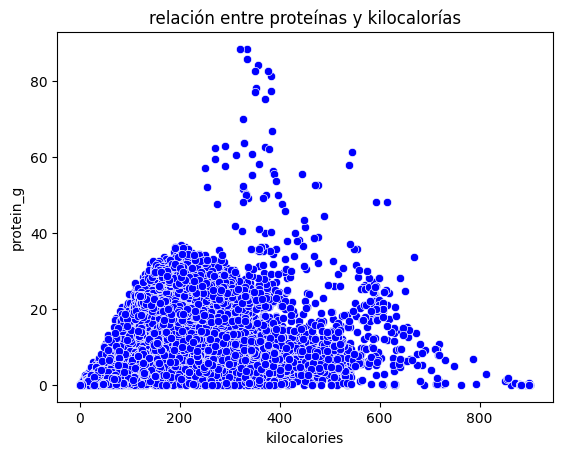

In [91]:
sns.scatterplot(data=df_1, x="kilocalories",y="protein_g",color="blue")
plt.title("relación entre proteínas y kilocalorías")

Text(0.5, 1.0, 'relación entre kilocalorias y grasa')

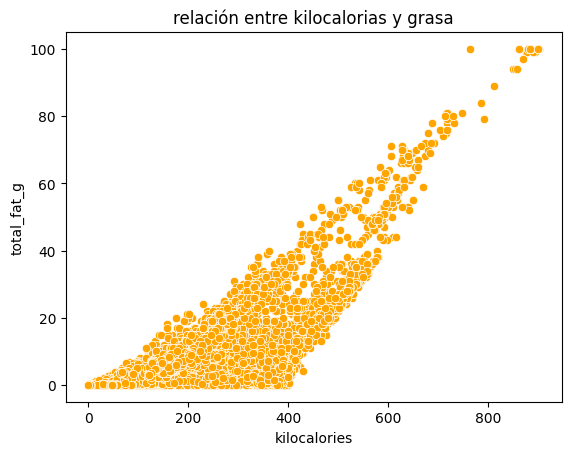

In [90]:
sns.scatterplot(data=df_1,x="kilocalories",y="total_fat_g",color="orange")
plt.title("relación entre kilocalorias y grasa")

Text(0.5, 1.0, 'relación entre kilocalorías y carbohidratos')

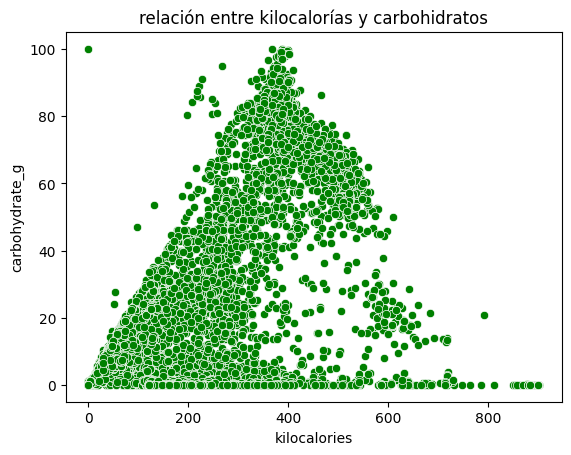

In [92]:
sns.scatterplot(data=df_1,x="kilocalories",y="carbohydrate_g",color="green")
plt.title("relación entre kilocalorías y carbohidratos")

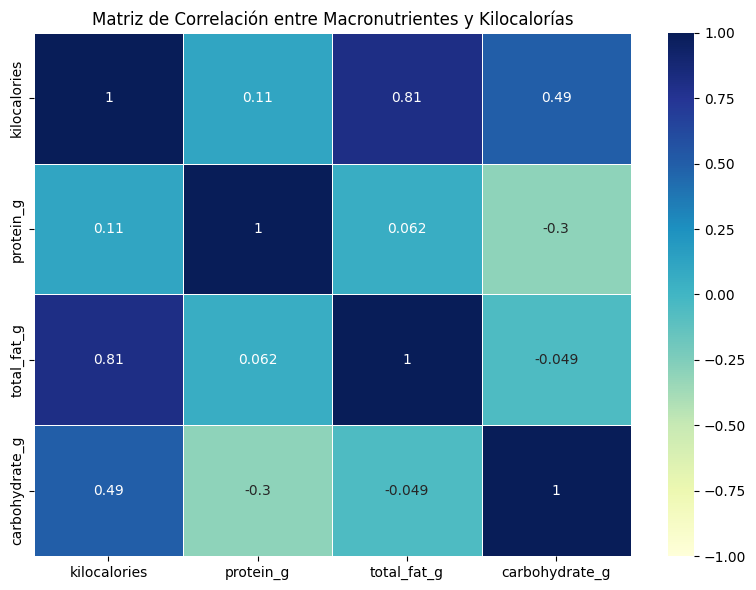

In [74]:
corr_matrix = df_1[['kilocalories', 'protein_g', 'total_fat_g', 'carbohydrate_g']].corr()

# Crear un gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu' , linewidths=0.5, vmin=-1, vmax=1)

# Añadir título y mostrar el gráfico
plt.title('Matriz de Correlación entre Macronutrientes y Kilocalorías')
plt.tight_layout()
plt.show()

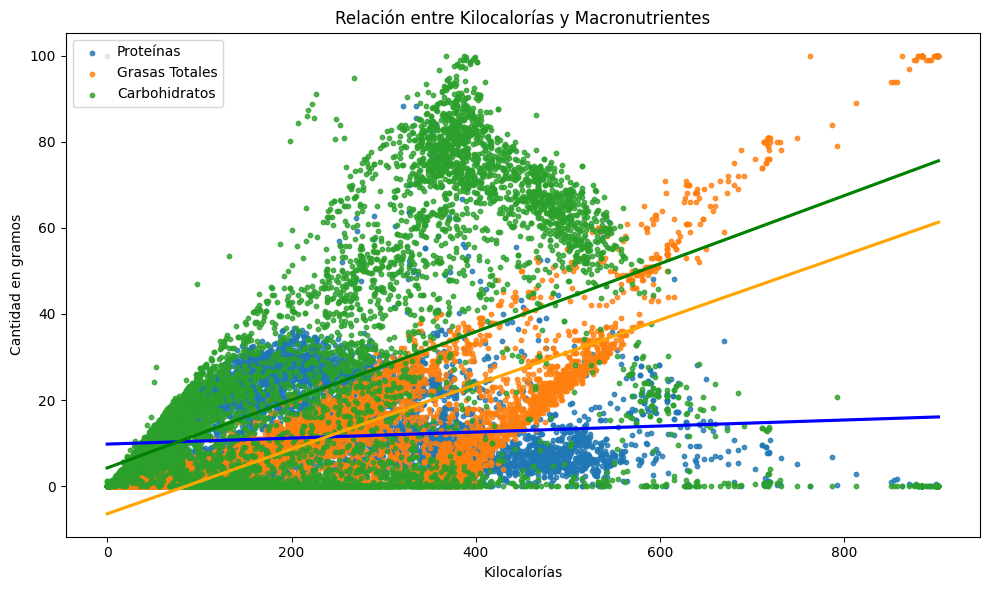

In [77]:


# Crear un gráfico de regresión para proteínas vs kilocalorías
plt.figure(figsize=(10, 6))
sns.regplot(data=df_1, x="kilocalories", y="protein_g", scatter_kws={'s': 10}, line_kws={'color': 'blue'}, ci=None, label='Proteínas')

# Crear un gráfico de regresión para grasas vs kilocalorías
sns.regplot(data=df_1, x="kilocalories", y="total_fat_g", scatter_kws={'s': 10}, line_kws={'color': 'orange'}, ci=None, label='Grasas Totales')

# Crear un gráfico de regresión para carbohidratos vs kilocalorías
sns.regplot(data=df_1, x="kilocalories", y="carbohydrate_g", scatter_kws={'s': 10}, line_kws={'color': 'green'}, ci=None, label='Carbohidratos')

# Añadir etiquetas y título
plt.xlabel('Kilocalorías')
plt.ylabel('Cantidad en gramos')
plt.title('Relación entre Kilocalorías y Macronutrientes')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
#OJO!!!!!!!!!!!!!!!!!!
#no hay intervalos de confianza (ci=None)


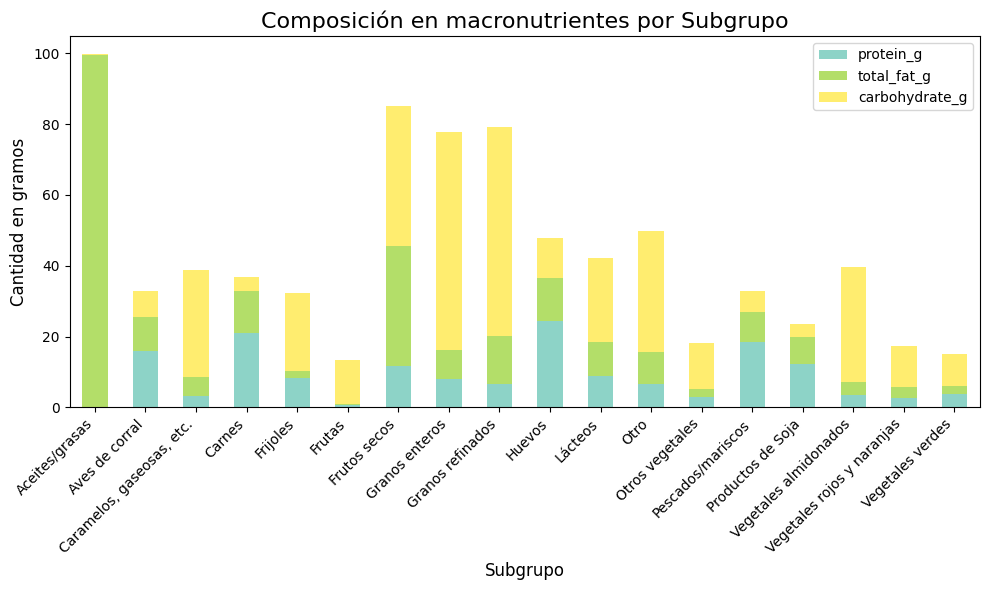

In [81]:


# Agrupar los datos por 'Subgrupo' y calcular la suma de macronutrientes
df_subgroup_macros = df_1.groupby('Subgrupo')[['protein_g', 'total_fat_g', 'carbohydrate_g']].mean()

# Crear un gráfico de barras apiladas
df_subgroup_macros.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set3')

# Añadir título y etiquetas
plt.title('Composición en macronutrientes por Subgrupo', fontsize=16)
plt.xlabel('Subgrupo', fontsize=12)
plt.ylabel('Cantidad en gramos', fontsize=12)

# Rotar etiquetas en el eje X para que se vean bien
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<Axes: xlabel='protein_g'>

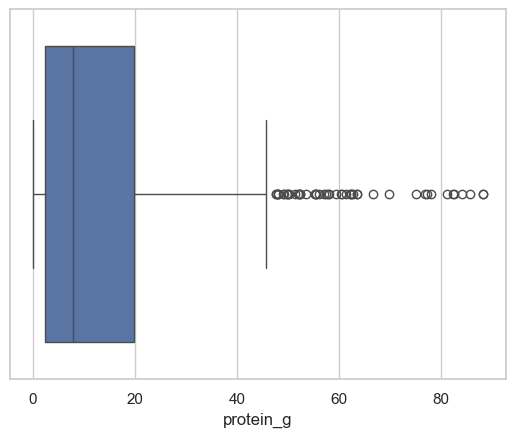

In [ ]:
sns.boxplot(data=df_1,x="protein_g")

In [ ]:
df_1[["protein_g","name"]].sort_values(by="protein_g",ascending=False)

,protein_g,name
213,88.32,Soy protein isolate
1378,88.32,"Soy protein isolate, potassium type"
1618,85.60,"Gelatins, unsweetened, dry powder"
3893,84.08,"Egg, glucose reduced, stabilized, dried, white"
4401,82.60,"Seal, dried (Alaska Native), meat, bearded (Oo..."
...,...,...
499,0.00,"Vinegar, cider"
501,0.00,"Oil, poppyseed"
502,0.00,"Oil, grapeseed"
504,0.00,"Pectin, liquid"


In [ ]:
#busqueda
df_1[df_1["name"].str.contains("hey")][["protein_g","name"]]

,protein_g,name
314,12.93,"Whey, dried, sweet"
315,0.85,"Whey, fluid, sweet"
380,11.73,"Whey, dried, acid"
381,0.76,"Whey, fluid, acid"
2227,58.14,"Beverages, Whey protein powder isolate"
2476,78.13,"Beverages, Protein powder whey based"
2728,66.67,"Beverages, EAS whey protein powder, ABBOTT"
5067,0.64,"Beverages, whey and milk based, Chocolate-flav..."
7048,27.87,"Beverages,, 3-2-1 Plan, whey powder, high prot..."


In [ ]:
plt.figure(figsize=(8,8))
sns.jointplot(x=df_1['kilocalories'],
              y=df_1['protein_g'],
              kind="kde",
              color="#4CB391");

## principales estadísticos de los macronutrientes

In [ ]:
macros=df_1[["protein_g","carbohydrate_g","total_fat_g"]]
macros.describe()

,protein_g,carbohydrate_g,total_fat_g
count,8789.000000,8789.000000,8789.000000
mean,11.345616,22.121915,10.556855
std,10.530602,27.266261,15.818247
min,0.000000,0.000000,0.000000
25%,2.380000,0.050000,1.000000
50%,8.020000,9.340000,5.100000
75%,19.880000,34.910000,14.000000
max,88.320000,100.000000,100.000000


In [ ]:
def agregar_media(ax, data, color):
    media = np.mean(data)
    ax.axvline(media, color=color, linestyle='--', linewidth=2)
    ax.text(media + 0.05, ax.get_ylim()[1] * 0.8, f'Media: {media:.2f}', color=color, fontsize=12, fontweight='bold')

In [ ]:
def agregar_media_y_cuartiles(ax, data, color):
    media = np.mean(data)
    q1 = np.percentile(data, 25)  # Primer cuartil
    q2 = np.median(data)          # Mediana (segundo cuartil)
    q3 = np.percentile(data, 75)  # Tercer cuartil
    
    # Dibujar las líneas de la media y los cuartiles
    ax.axvline(media, color=color, linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(q1, color='purple', linestyle='-.', linewidth=2, label=f'Q1: {q1:.2f}')
    ax.axvline(q2, color='orange', linestyle='-.', linewidth=2, label=f'Mediana: {q2:.2f}')
    ax.axvline(q3, color='green', linestyle='-.', linewidth=2, label=f'Q3: {q3:.2f}')
    
    # Añadir texto para las estadísticas
    #ax.text(media + 0.05, ax.get_ylim()[1] * 0.8, f'Media: {media:.2f}', color=color, fontsize=12, fontweight='bold')
    #ax.text(q1 + 0.05, ax.get_ylim()[1] * 0.7, f'Q1: {q1:.2f}', color='purple', fontsize=12, fontweight='bold')
    #ax.text(q2 + 0.05, ax.get_ylim()[1] * 0.6, f'Mediana: {q2:.2f}', color='orange', fontsize=12, fontweight='bold')
    #ax.text(q3 + 0.05, ax.get_ylim()[1] * 0.5, f'Q3: {q3:.2f}', color='green', fontsize=12, fontweight='bold')

    # Añadir leyenda
    ax.legend()

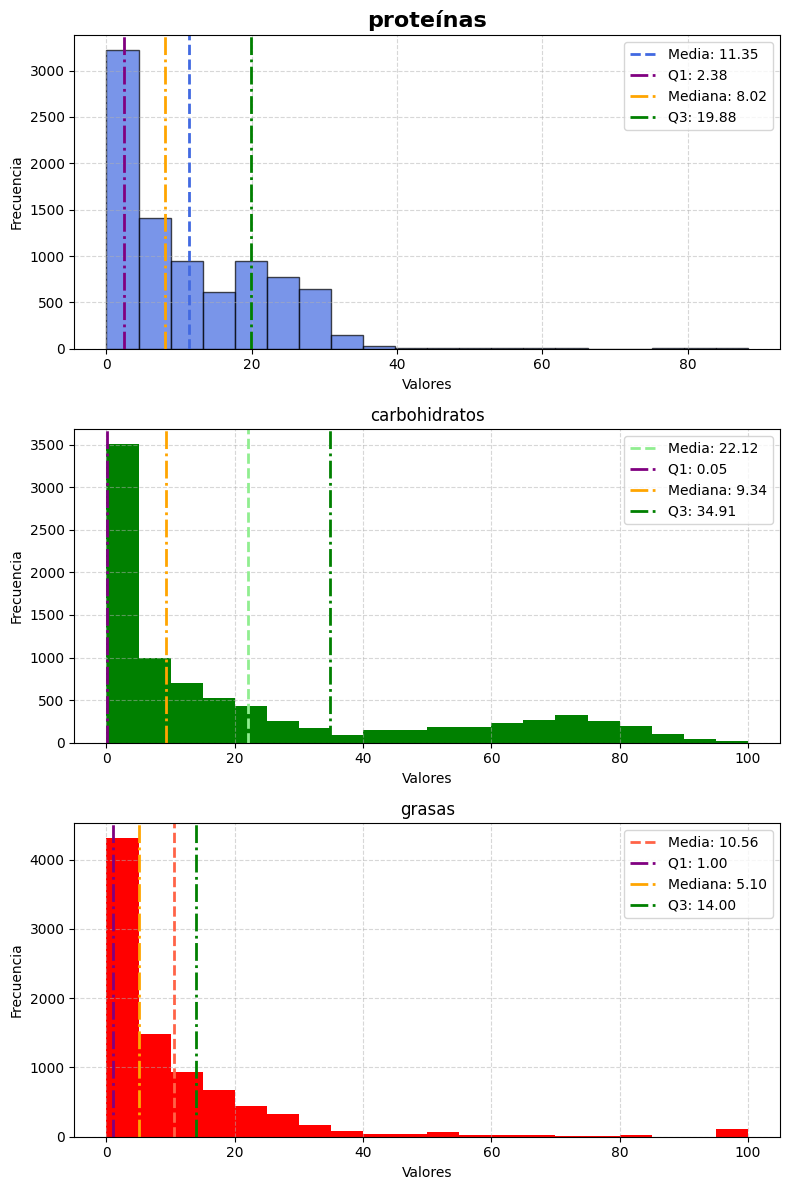

In [ ]:






# Crear los histogramas
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Primer histograma para 'columna_1'
#primer histograma estilizado para prueba
axes[0].hist(macros['protein_g'], color='royalblue', edgecolor="black",alpha=0.7, bins=20)
axes[0].set_title('proteínas' , fontsize=16, fontweight='bold')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, linestyle='--', alpha=0.5)
agregar_media_y_cuartiles(axes[0], macros['protein_g'], 'royalblue')

# Segundo histograma para 'columna_2'
axes[1].hist(macros['carbohydrate_g'], color='green', bins=20)
axes[1].set_title('carbohidratos')
axes[1].set_xlabel('Valores')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', alpha=0.5)
agregar_media_y_cuartiles(axes[1], macros['carbohydrate_g'], 'lightgreen')

# Tercer histograma para 'columna_3'
axes[2].hist(macros['total_fat_g'], color='red', bins=20)
axes[2].set_title('grasas')
axes[2].set_xlabel('Valores')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, linestyle='--', alpha=0.5)
agregar_media_y_cuartiles(axes[2], macros['total_fat_g'], 'tomato')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar los histogramas
plt.show()


In [ ]:
df_1

,name,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g
0,Cornstarch,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.0,0.0,0.09,0.0,0.0,8.32,0.122,0.146,0.268,0.060
1,"Nuts, pecans",691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,0.0,0.0,1.49,0.0,0.0,3.52,4.422,4.469,8.891,1.345
2,"Eggplant, raw",25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.0,0.0,0.66,0.0,0.0,92.30,0.413,0.536,0.949,0.162
3,"Teff, uncooked",367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,0.0,0.0,2.37,0.0,0.0,8.82,5.636,6.961,12.597,2.255
4,"Sherbet, orange",144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,1.0,0.0,0.40,0.0,0.0,66.10,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,62.0,0.0,1.11,0.0,0.0,72.51,12.464,11.504,23.968,4.285
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,109.0,0.0,1.60,0.0,0.0,59.95,15.073,12.952,28.025,5.327
8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,78.0,0.0,0.92,0.0,0.0,59.80,8.526,7.326,15.852,3.013
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,60.0,0.0,1.10,0.0,0.0,73.43,13.362,12.290,25.652,4.649


<Figure size 1000x600 with 0 Axes>

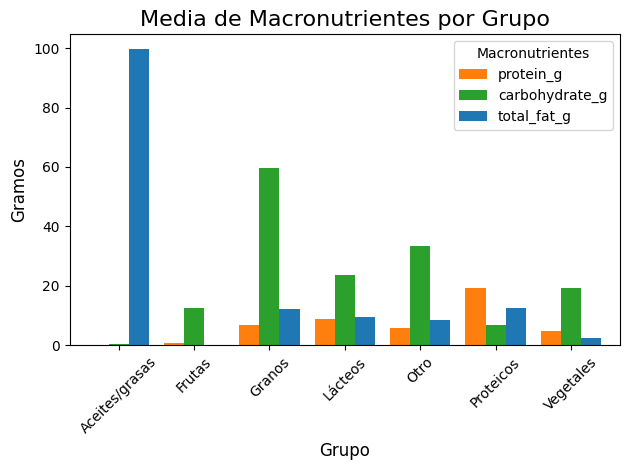

<Figure size 1200x800 with 0 Axes>

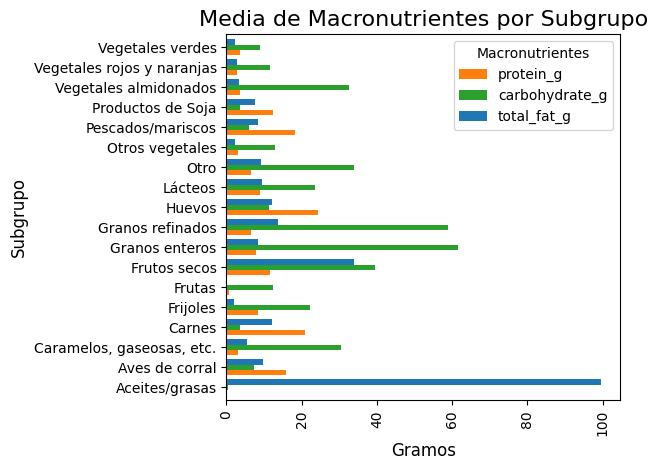

In [ ]:
macronutrientes = ['protein_g', 'carbohydrate_g', 'total_fat_g']

# Calcular la media de cada macronutriente por grupo
df_group_mean = df_1.groupby('Grupo')[macronutrientes].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
df_group_mean.set_index('Grupo')[macronutrientes].plot(kind='bar', width=0.8, color=['#ff7f0e', '#2ca02c', '#1f77b4'])
plt.title('Media de Macronutrientes por Grupo', fontsize=16)
plt.ylabel('Gramos', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Macronutrientes', loc='upper right')

plt.tight_layout()
plt.show()

# 2. Gráfico de la media de los macronutrientes agrupados por Subgrupo
df_subgroup_mean = df_1.groupby('Subgrupo')[macronutrientes].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 8))
df_subgroup_mean.set_index('Subgrupo')[macronutrientes].plot(kind='barh', width=0.8, color=['#ff7f0e', '#2ca02c', '#1f77b4'])
plt.title('Media de Macronutrientes por Subgrupo', fontsize=16)
plt.ylabel('Subgrupo', fontsize=12)
plt.xlabel('Gramos', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Macronutrientes', loc='upper right')
plt.tight_layout()
plt.show()

### alimentos con mas proteinas

In [ ]:
df_1.sort_values(by="protein_g",ascending=False)[["name","protein_g","Subgrupo"]].head(10)


,name,protein_g,Subgrupo
213,Soy protein isolate,88.32,Otro
1378,"Soy protein isolate, potassium type",88.32,Otro
1618,"Gelatins, unsweetened, dry powder",85.60,Otro
3893,"Egg, glucose reduced, stabilized, dried, white",84.08,Huevos
4401,"Seal, dried (Alaska Native), meat, bearded (Oo...",82.60,Carnes
5357,"Egg, glucose reduced, stabilized, powder, drie...",82.40,Huevos
389,"Egg, dried, white",81.10,Huevos
2476,"Beverages, Protein powder whey based",78.13,"Caramelos, gaseosas, etc."
3546,"Steelhead trout, flesh (Shoshone Bannock), dried",77.27,Otro
5356,"Egg, glucose reduced, stabilized, flakes, drie...",76.92,Huevos


### alimentos con mas AA esenciales

In [ ]:
df_1.sort_values(by="AminEsenc",ascending=False)[["name","AminEsenc","Subgrupo"]].head(10)

,name,AminEsenc,Subgrupo
3893,"Egg, glucose reduced, stabilized, dried, white",46.718,Huevos
5357,"Egg, glucose reduced, stabilized, powder, drie...",46.698,Huevos
389,"Egg, dried, white",43.664,Huevos
5356,"Egg, glucose reduced, stabilized, flakes, drie...",43.592,Huevos
213,Soy protein isolate,41.756,Otro
1378,"Soy protein isolate, potassium type",41.756,Otro
1618,"Gelatins, unsweetened, dry powder",38.636,Otro
4401,"Seal, dried (Alaska Native), meat, bearded (Oo...",37.870,Carnes
3089,"Whale, dried (Alaska Native), meat, beluga",33.744,Pescados/mariscos
2370,"Fish, dried and salted, Atlantic, cod",32.222,Pescados/mariscos


### Alimentos con mas BCAAs

In [ ]:
df_1.sort_values(by="BCAA_g",ascending=False)[["name","BCAA_g","Grupo","Subgrupo"]].head(10)

,name,BCAA_g,Grupo,Subgrupo
5357,"Egg, glucose reduced, stabilized, powder, drie...",18.365,Proteicos,Huevos
3893,"Egg, glucose reduced, stabilized, dried, white",17.494,Proteicos,Huevos
5356,"Egg, glucose reduced, stabilized, flakes, drie...",17.144,Proteicos,Huevos
389,"Egg, dried, white",16.583,Proteicos,Huevos
1378,"Soy protein isolate, potassium type",15.134,Otro,Otro
213,Soy protein isolate,15.134,Otro,Otro
4401,"Seal, dried (Alaska Native), meat, bearded (Oo...",12.748,Proteicos,Carnes
1112,"Seaweed, dried, spirulina",11.668,Vegetales,Otros vegetales
3089,"Whale, dried (Alaska Native), meat, beluga",11.272,Proteicos,Pescados/mariscos
2370,"Fish, dried and salted, Atlantic, cod",11.237,Proteicos,Pescados/mariscos


### grafico comparando proteinas y AA esenciales
para varios alimentos: huevo, gelatina, lentejas, soja, pan, pollo
1085,

In [ ]:
df1[df_1["name"].str.contains("elatin")]




,name,serving_size,kilocalories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
1122,"Gelatin desserts, dry mix",100 g,381,0,NaN,0,466.00 mg,3.5 mg,3.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.70 g,0.00 mg,0.00 mg,1.00 g
1618,"Gelatins, unsweetened, dry powder",100 g,335,0.1,0.1g,0,196.00 mg,38.5 mg,30.00 mcg,0.00 mcg,...,0.10 g,0.070 g,0.060 g,0.010 g,0.00 mg,0.0 g,1.30 g,0.00 mg,0.00 mg,13.00 g
3845,"Gelatin desserts, prepared with water, dry mix",100 g,62,0,NaN,0,75.00 mg,0.5 mg,1.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.20 g,0.00 mg,0.00 mg,84.39 g
4836,"Gelatin desserts, with aspartame, reduced calo...",100 g,198,0,NaN,0,862.00 mg,0.0 mg,0.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,2.18 g,0.00 mg,0.00 mg,1.93 g
7068,"Gelatin desserts, prepared with water, with as...",100 g,20,0,NaN,0,48.00 mg,0.0 mg,0.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.21 g,0.00 mg,0.00 mg,94.74 g
7216,"Gelatin desserts, sodium-citrate and salt, wit...",100 g,381,0,NaN,0,491.00 mg,0,3.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0,0,0.00 mg,0,0.70 g,0.00 mg,0.00 mg,1.00 g
7259,"Gelatin desserts, no added sodium, with aspart...",100 g,345,0,NaN,0,158.00 mg,0,14.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0,0,0.00 mg,0,4.70 g,0.00 mg,0.00 mg,6.70 g
8491,"Gelatin desserts, vitamin C, sodium, potassium...",100 g,345,0,NaN,0,2751.00 mg,0,14.00 mcg,0.00 mcg,...,0.00 g,0.000 g,0,0,0.00 mg,0,4.70 g,0.00 mg,0.00 mg,6.70 g


In [ ]:
df_1["Subgrupo"].unique()

array(['Vegetales almidonados', 'Frutos secos', 'Otros vegetales',
       'Granos enteros', 'Otro', 'Vegetales verdes', 'Carnes', 'Lácteos',
       'Granos refinados', 'Aves de corral', 'Frutas',
       'Caramelos, gaseosas, etc.', 'Frijoles', 'Pescados/mariscos',
       'Vegetales rojos y naranjas', 'Huevos', 'Aceites/grasas',
       'Productos de Soja'], dtype=object)

In [ ]:
df_1[df_1["Subgrupo"]=="Pescados/mariscos"][["name","protein_g"]].sort_values(by="protein_g",ascending=False)

,name,protein_g
3089,"Whale, dried (Alaska Native), meat, beluga",69.86
2370,"Fish, dried and salted, Atlantic, cod",62.82
2267,"Fish, dried (Alaska Native), whitefish",62.44
3281,"Fish, dried (Alaska Native), chum, salmon",62.09
5545,"Salmon, smoked (Alaska Native), filets with sk...",60.62
...,...,...
293,"Fish oil, menhaden",0.00
422,"Fish oil, salmon",0.00
355,"Fish oil, sardine",0.00
356,"Fish oil, herring",0.00


### alimentos con mas proteinas por cada subgrupo

In [45]:
max_values = df_1.loc[df_1.groupby('Subgrupo')['protein_g'].idxmax()]
max_values[["Subgrupo","name","protein_g","AminEsenc"]].sort_values(by="protein_g",ascending=False)



,Subgrupo,name,protein_g,AminEsenc
213,Otro,Soy protein isolate,88.32,41.756
3893,Huevos,"Egg, glucose reduced, stabilized, dried, white",84.08,46.718
4401,Carnes,"Seal, dried (Alaska Native), meat, bearded (Oo...",82.60,37.870
2476,"Caramelos, gaseosas, etc.","Beverages, Protein powder whey based",78.13,47.500
3089,Pescados/mariscos,"Whale, dried (Alaska Native), meat, beluga",69.86,33.744
1112,Otros vegetales,"Seaweed, dried, spirulina",57.47,30.426
696,Productos de Soja,"Tofu, dried-frozen (koyadofu)",52.47,22.970
2700,Frijoles,"Soybeans, dry roasted, mature seeds",43.32,20.186
813,Lácteos,"Cheese, low sodium, parmesan",41.60,17.959
1816,Aves de corral,"Emu, broiled, cooked, full rump",33.67,11.660


In [44]:
df_1.loc[2476, 'AminEsenc'] = 47.5    
df_1.loc[813,"AminEsenc"]=17.959 

C:\Users\MPozo\AppData\Local\Temp\ipykernel_6348\1309677412.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(max_values_sorted))  # Cambiar tab10 a tab20 para más colores


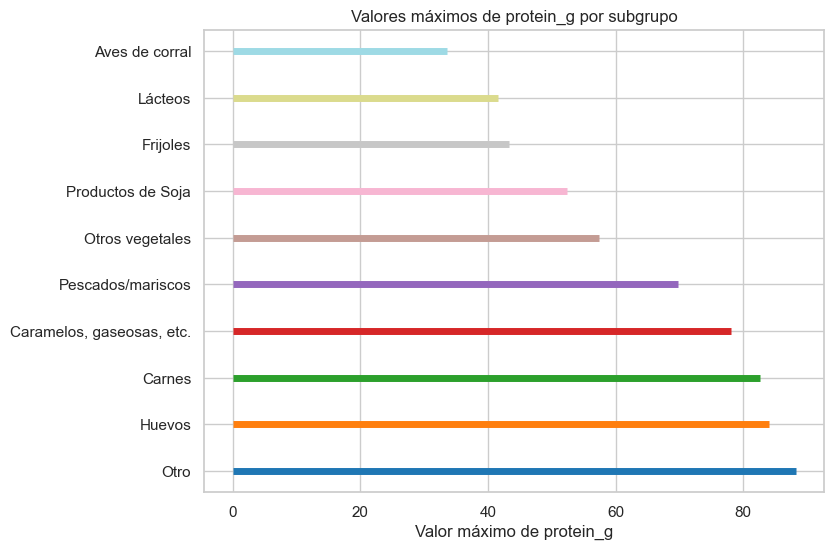

In [ ]:
max_values_sorted = max_values[["Subgrupo", "name", "protein_g"]].sort_values(by="protein_g", ascending=False).head(10)

colores = plt.cm.get_cmap("tab20", len(max_values_sorted))  # Cambiar tab10 a tab20 para más colores
colores = colores(np.linspace(0, 1, len(max_values_sorted)))

# Crear gráfico de líneas horizontales
plt.figure(figsize=(8, 6))

for i, row in enumerate(max_values_sorted.itertuples()):
    subgrupo = row.Subgrupo
    max_val = row.protein_g
    plt.hlines(i, 0, max_val, color=colores[i], linewidth=5, label=f'{subgrupo} (Max: {max_val})')

# Etiquetas del eje Y con el índice de los subgrupos
plt.yticks(np.arange(len(max_values_sorted)), max_values_sorted['Subgrupo'])

# Añadir título y etiquetas
plt.title('Valores máximos de protein_g por subgrupo')
plt.xlabel('Valor máximo de protein_g')
plt.ylabel('')

# Mostrar leyenda (solo mostrarla una vez, por cada subgrupo)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1.05, 1))

# Mostrar gráfico
plt.show()

### alimentos con mas AA esenciales por subgrupo

In [93]:
max_values_AAE = df_1.loc[df_1.groupby('Subgrupo')['AminEsenc'].idxmax()]
max_values_AAE[["Subgrupo","name","AminEsenc"]].sort_values(by="AminEsenc",ascending=False).head(10)

,Subgrupo,name,AminEsenc
2476,"Caramelos, gaseosas, etc.","Beverages, Protein powder whey based",47.500
3893,Huevos,"Egg, glucose reduced, stabilized, dried, white",46.718
213,Otro,Soy protein isolate,41.756
4401,Carnes,"Seal, dried (Alaska Native), meat, bearded (Oo...",37.870
3089,Pescados/mariscos,"Whale, dried (Alaska Native), meat, beluga",33.744
1112,Otros vegetales,"Seaweed, dried, spirulina",30.426
696,Productos de Soja,"Tofu, dried-frozen (koyadofu)",22.970
1016,Lácteos,"Cheese, shredded, parmesan",20.878
905,Frijoles,"Soybeans, raw, mature seeds",20.729
4061,Vegetales rojos y naranjas,"Seeds, dried, pumpkin and squash seed kernels",17.953


C:\Users\MPozo\AppData\Local\Temp\ipykernel_6348\3003657204.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(max_values_AAE_sorted))  # Cambiar tab10 a tab20 para más colores


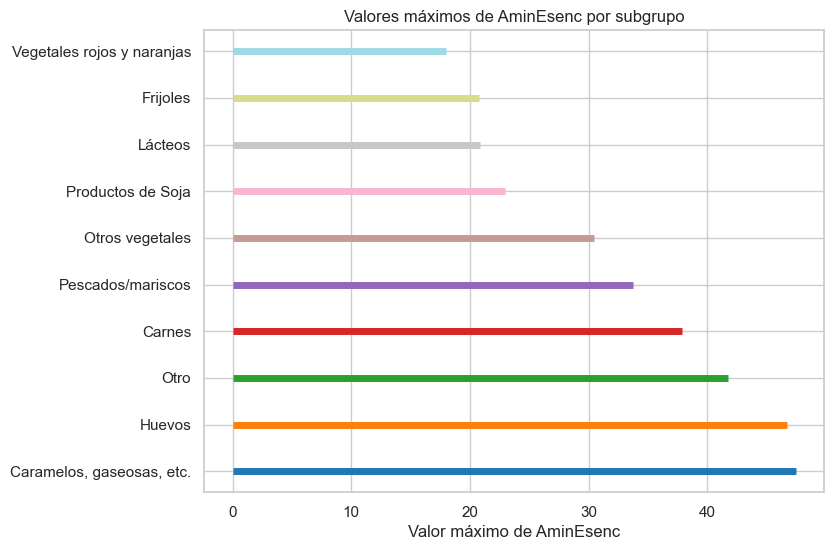

In [ ]:
max_values_AAE_sorted = max_values_AAE[["Subgrupo", "name", "AminEsenc"]].sort_values(by="AminEsenc", ascending=False).head(10)

colores = plt.cm.get_cmap("tab20", len(max_values_AAE_sorted))  # Cambiar tab10 a tab20 para más colores
colores = colores(np.linspace(0, 1, len(max_values_AAE_sorted)))

# Crear gráfico de líneas horizontales
plt.figure(figsize=(8, 6))

for i, row in enumerate(max_values_AAE_sorted.itertuples()):
    subgrupo = row.Subgrupo
    max_val = row.AminEsenc
    plt.hlines(i, 0, max_val, color=colores[i], linewidth=5, label=f'{subgrupo} (Max: {max_val})')

# Etiquetas del eje Y con el índice de los subgrupos
plt.yticks(np.arange(len(max_values_AAE_sorted)), max_values_AAE_sorted['Subgrupo'])

# Añadir título y etiquetas
plt.title('Valores máximos de AminEsenc por subgrupo')
plt.xlabel('Valor máximo de AminEsenc')
plt.ylabel('')

# Mostrar leyenda (solo mostrarla una vez, por cada subgrupo)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper left',bbox_to_anchor=(1.05, 1))


# Mostrar gráfico
plt.show()


### grafico comparativo( alimentos mas proteicos por grupo y su respectiva cantidad de aminoacidos esenciales)

C:\Users\MPozo\AppData\Local\Temp\ipykernel_6348\68781913.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(max_values_sorted))  # Cambiar tab10 a tab20 para más colores


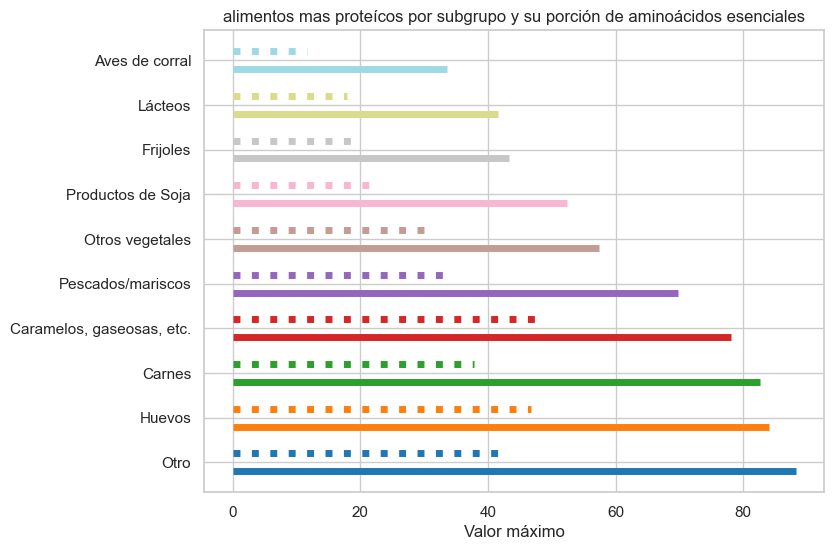

In [ ]:
max_values_sorted = max_values[["Subgrupo", "name", "protein_g", "AminEsenc"]].sort_values(by="protein_g", ascending=False).head(10)

colores = plt.cm.get_cmap("tab20", len(max_values_sorted))  # Cambiar tab10 a tab20 para más colores
colores = colores(np.linspace(0, 1, len(max_values_sorted)))

# Crear gráfico de líneas horizontales
plt.figure(figsize=(8, 6))

# Ajustar el desplazamiento de las barras para que no se superpongan
desplazamiento = 0.2  # Desplazamiento para la barra de AminEsenc

for i, row in enumerate(max_values_sorted.itertuples()):
    subgrupo = row.Subgrupo
    max_val_protein = row.protein_g
    max_val_AminEsenc = row.AminEsenc
    # Barra para protein_g (con posición original)
    plt.hlines(i - desplazamiento, 0, max_val_protein, color=colores[i], linewidth=5, label=f'{subgrupo} (Max protein_g: {max_val_protein})')
    # Barra para AminEsenc (con desplazamiento para evitar superposición)
    plt.hlines(i + desplazamiento, 0, max_val_AminEsenc, color=colores[i], linestyle=':', linewidth=5, label=f'{subgrupo} (Max AminEsenc: {max_val_AminEsenc})')

# Etiquetas del eje Y con el índice de los subgrupos
plt.yticks(np.arange(len(max_values_sorted)), max_values_sorted['Subgrupo'])

# Añadir título y etiquetas
plt.title('alimentos mas proteícos por subgrupo y su porción de aminoácidos esenciales')
plt.xlabel('Valor máximo')
plt.ylabel('')

# Mostrar leyenda (solo mostrarla una vez, por cada subgrupo)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1.05, 1))

# Mostrar gráfico
plt.show()


In [46]:
df_1

,name,kilocalories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,...,ash_g,caffeine_mg,theobromine_mg,water_g,AminEsenc,AminNoEsenc,AminTotal_g,BCAA_g,Subgrupo,Grupo
0,Cornstarch,381,0.1,NaN,0,9.0,0.4,0.0,0.0,0.000,...,0.09,0.0,0.0,8.32,0.122,0.146,0.268,0.060,Vegetales almidonados,Vegetales
1,"Nuts, pecans",691,72.0,6.2,0,0.0,40.5,22.0,0.0,1.167,...,1.49,0.0,0.0,3.52,4.422,4.469,8.891,1.345,Frutos secos,Proteicos
2,"Eggplant, raw",25,0.2,NaN,0,2.0,6.9,22.0,0.0,0.649,...,0.66,0.0,0.0,92.30,0.413,0.536,0.949,0.162,Otros vegetales,Vegetales
3,"Teff, uncooked",367,2.4,0.4,0,12.0,13.1,0.0,0.0,3.363,...,2.37,0.0,0.0,8.82,5.636,6.961,12.597,2.255,Granos enteros,Granos
4,"Sherbet, orange",144,2.0,1.2,1,46.0,7.7,4.0,0.0,0.063,...,0.40,0.0,0.0,66.10,0.000,0.000,0.000,0.000,Otro,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,62,54.0,64.5,4.0,0.0,6.422,...,1.11,0.0,0.0,72.51,12.464,11.504,23.968,4.285,Carnes,Proteicos
8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,109,50.0,0.0,0.0,0.0,7.680,...,1.60,0.0,0.0,59.95,15.073,12.952,28.025,5.327,Carnes,Proteicos
8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,78,39.0,0.0,1.0,0.0,6.550,...,0.92,0.0,0.0,59.80,8.526,7.326,15.852,3.013,Carnes,Proteicos
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,60,53.0,64.2,4.0,0.0,6.720,...,1.10,0.0,0.0,73.43,13.362,12.290,25.652,4.649,Carnes,Proteicos


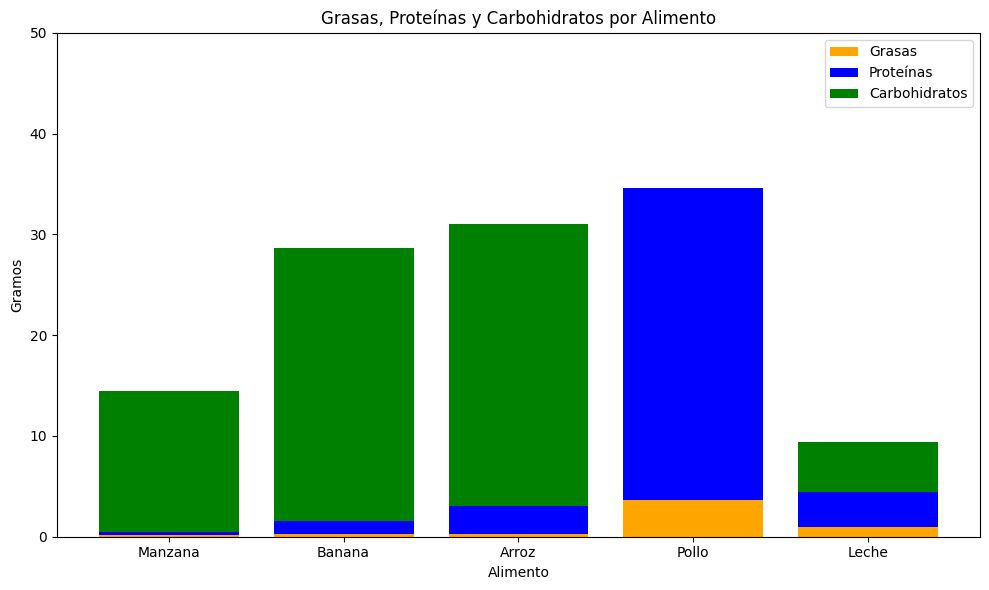

In [47]:


# Crear un DataFrame con los alimentos y sus valores
data = {
    'Alimento': ['Manzana', 'Banana', 'Arroz', 'Pollo', 'Leche'],
    'Kilocalorias': [52, 96, 130, 165, 42],
    'Grasas (g)': [0.2, 0.3, 0.3, 3.6, 1],
    'Proteínas (g)': [0.3, 1.3, 2.7, 31, 3.4],
    'Carbohidratos (g)': [14, 27, 28, 0, 5]
}

df = pd.DataFrame(data)

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras apiladas
ax.bar(df['Alimento'], df['Grasas (g)'], label='Grasas', color='orange')
ax.bar(df['Alimento'], df['Proteínas (g)'], bottom=df['Grasas (g)'], label='Proteínas', color='blue')
ax.bar(df['Alimento'], df['Carbohidratos (g)'], bottom=df['Grasas (g)'] + df['Proteínas (g)'], label='Carbohidratos', color='green')

# Etiquetas y título
ax.set_xlabel('Alimento')
ax.set_ylabel('Gramos')
ax.set_title('Grasas, Proteínas y Carbohidratos por Alimento')
ax.set_ylim(0, 50)  # Limitar el eje Y para mayor claridad

# Mostrar leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### bonus track: antioxidantes

In [ ]:
df2[["Food","Antioxidant Score"]].sort_values(by="Antioxidant Score",ascending=False)

,Food,Antioxidant Score
82,Cinnamon,131420
12,Turmeric,127068
74,Cayenne Pepper,50314
69,Acai Berries,15405
18,Ginger,14840
...,...,...
48,Cantaloupe,270
75,Watermelon,182
67,Zucchini,180
70,Cucumber,140
